In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sqlalchemy import create_engine

In [2]:
base_path = r"F:\\DOUTORADO_RENATO\\PESQUISAS\\MEUS_TRABALHOS\\AGUA_E_SAL\\data"
db_path   = os.path.join(base_path, 'todos_comprimentos_de_onda.db')
engine    = create_engine(f"sqlite:///{db_path}")

In [5]:

query = f"""
SELECT 
    wavelength_LPG_measurement,
    wavelength_LPG_reference,
    rodadas,
    amostras,
    data,
    brix
FROM resonance_summary
"""

df = pd.read_sql_query(query, con=engine)
print(df.shape)

(4282, 6)


In [13]:
df['wavelength_normalizado'] = df['wavelength_LPG_measurement'] - df['wavelength_LPG_reference']
df.head()

,wavelength_LPG_measurement,wavelength_LPG_reference,rodadas,amostras,data,brix,wavelength_normalizado
0,1549.365,1573.845,Rodada 1,Somente água com sal,07/05/2025,0.0,-24.48
1,1549.365,1573.845,Rodada 1,Somente água com sal,07/05/2025,0.0,-24.48
2,1549.365,1573.845,Rodada 1,Somente água com sal,07/05/2025,0.0,-24.48
3,1549.365,1573.845,Rodada 1,Somente água com sal,07/05/2025,0.0,-24.48
4,1549.365,1573.845,Rodada 1,Somente água com sal,07/05/2025,0.0,-24.48


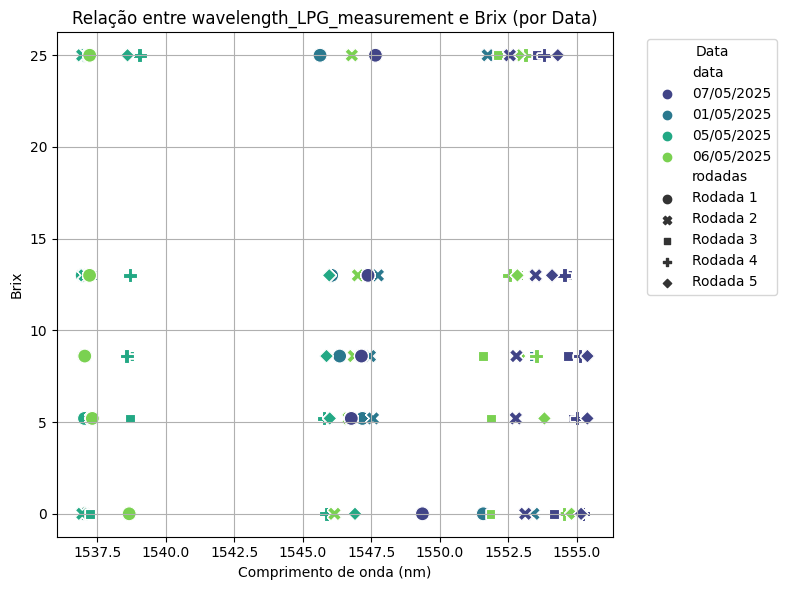

In [11]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df,
    x='wavelength_LPG_measurement',
    y='brix',
    hue='data',  # Cor por data
    style='rodadas',  # Estilo do marcador por rodada (opcional)
    palette='viridis',  # Esquema de cores
    s=100,  # Tamanho dos pontos
)

plt.title('Relação entre wavelength_LPG_measurement e Brix (por Data)')
plt.xlabel('Comprimento de onda (nm)')
plt.ylabel('Brix')
plt.legend(title='Data', bbox_to_anchor=(1.05, 1), loc='upper left')  # Legenda fora do gráfico
plt.grid(True)
plt.tight_layout()  # Ajustar layout
plt.show()

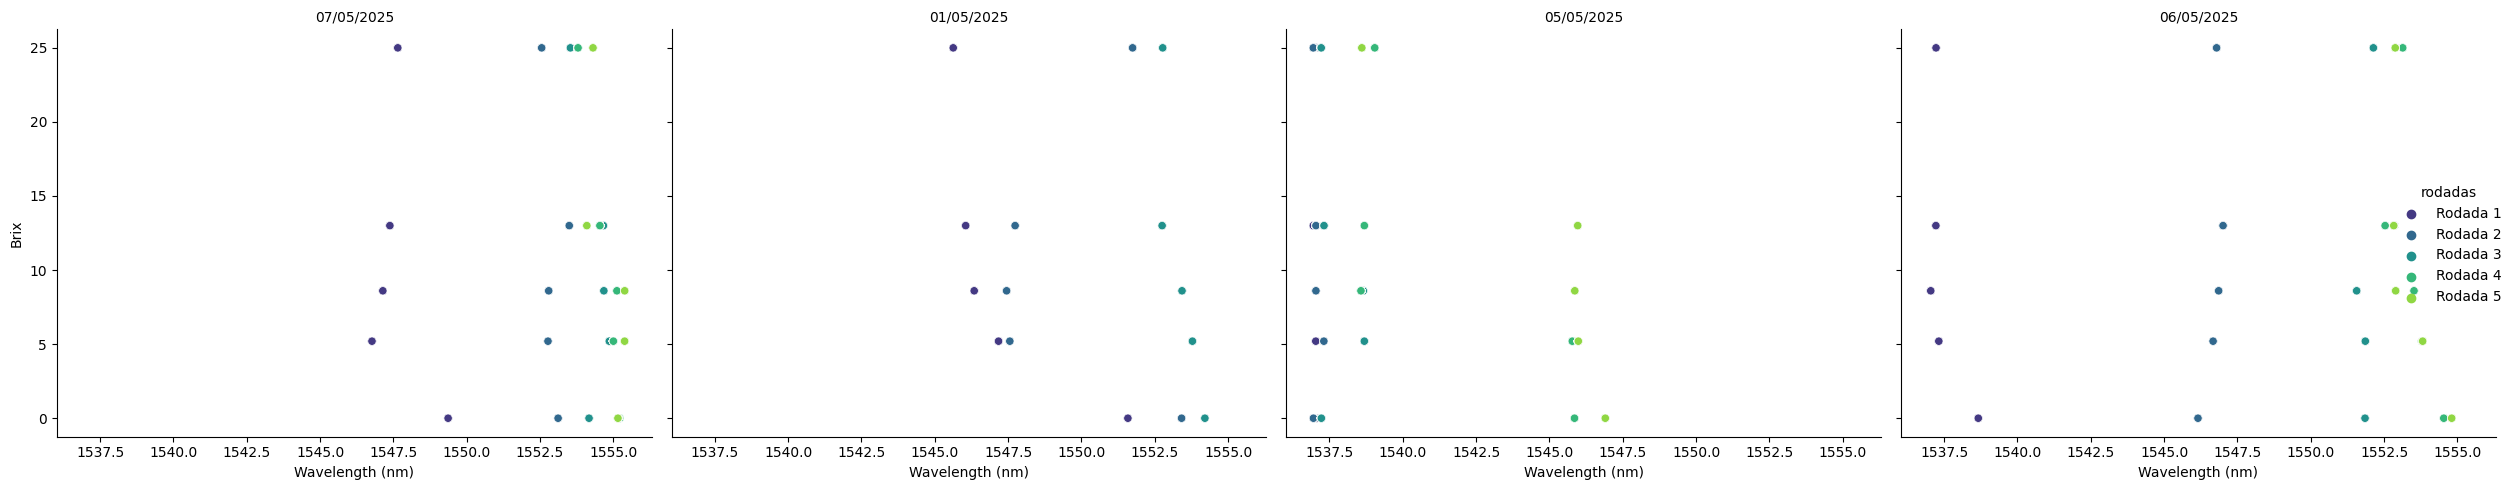

In [14]:
g = sns.relplot(
    data=df,
    x='wavelength_LPG_measurement',
    y='brix',
    hue='rodadas',  # Cor por rodada (se houver múltiplas rodadas no mesmo dia)
    col='data',  # Subplots separados por data
    kind='scatter',
    palette='viridis',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True},  # Mesmos eixos para todos
)

# Ajustar títulos e layout
g.set_axis_labels("Wavelength (nm)", "Brix")
g.set_titles(col_template="{col_name}")  # Título de cada subplot = data
plt.tight_layout()
plt.show()

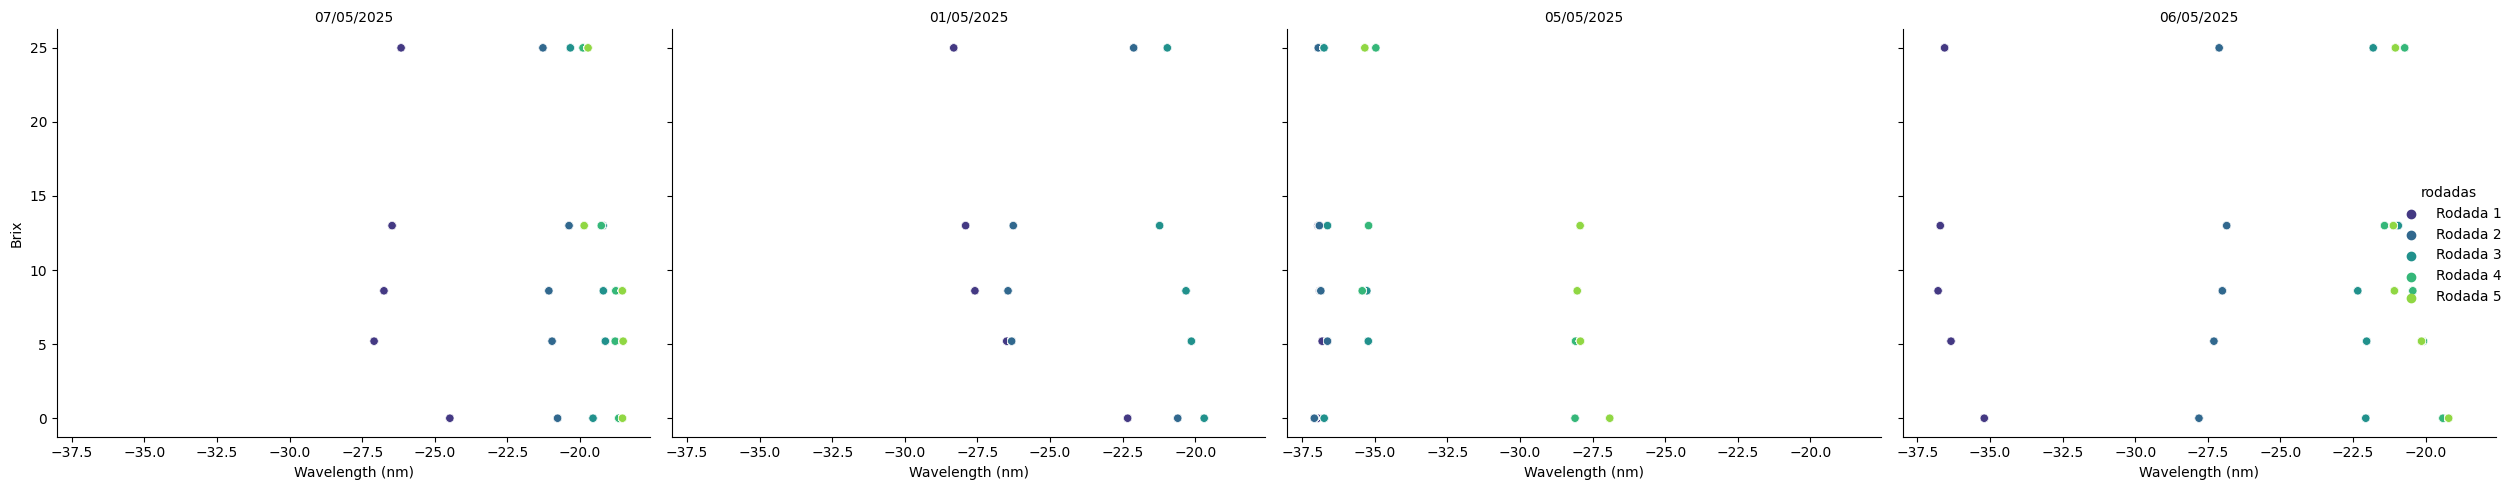

In [15]:
g = sns.relplot(
    data=df,
    x='wavelength_normalizado',
    y='brix',
    hue='rodadas',  # Cor por rodada (se houver múltiplas rodadas no mesmo dia)
    col='data',  # Subplots separados por data
    kind='scatter',
    palette='viridis',
    height=5,
    aspect=1.2,
    facet_kws={'sharey': True, 'sharex': True},  # Mesmos eixos para todos
)

# Ajustar títulos e layout
g.set_axis_labels("Wavelength (nm)", "Brix")
g.set_titles(col_template="{col_name}")  # Título de cada subplot = data
plt.tight_layout()
plt.show()

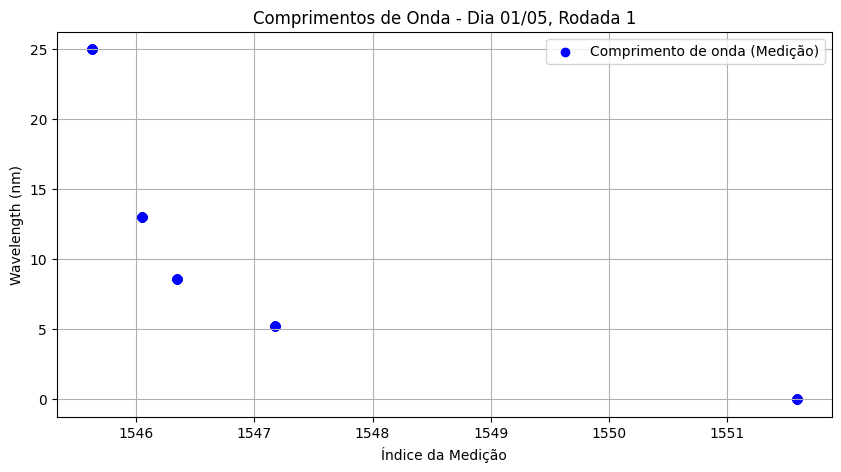

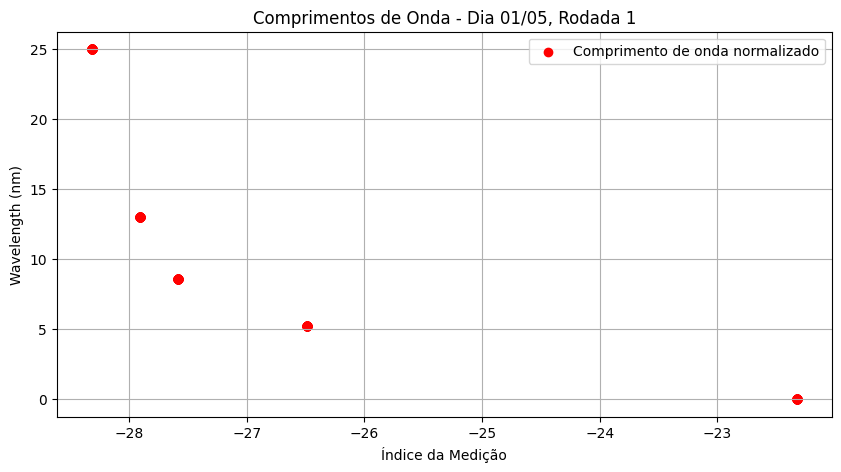

In [25]:
plt.figure(figsize=(10, 5))

df_filtrado = df[(df['data'] == '01/05/2025') & (df['rodadas'] == 'Rodada 1')]
plt.scatter(
    df_filtrado['wavelength_LPG_measurement'],
    df_filtrado['brix'],
    marker='o',  # Marcadores em cada ponto
    linestyle='-',  # Linha contínua
    color='blue',
    label='Comprimento de onda (Medição)'
)
plt.title('Comprimentos de Onda - Dia 01/05, Rodada 1')
plt.xlabel('Índice da Medição')
plt.ylabel('Wavelength (nm)')
plt.grid(True)
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
df_filtrado = df[(df['data'] == '01/05/2025') & (df['rodadas'] == 'Rodada 1')]
plt.scatter(
    df_filtrado['wavelength_normalizado'],
    df_filtrado['brix'],
    marker='o',  # Marcadores em cada ponto
    linestyle='-',  # Linha contínua
    color='red',
    label='Comprimento de onda normalizado'
)
plt.title('Comprimentos de Onda - Dia 01/05, Rodada 1')
plt.xlabel('Índice da Medição')
plt.ylabel('Wavelength (nm)')
plt.grid(True)
plt.legend()
plt.show()


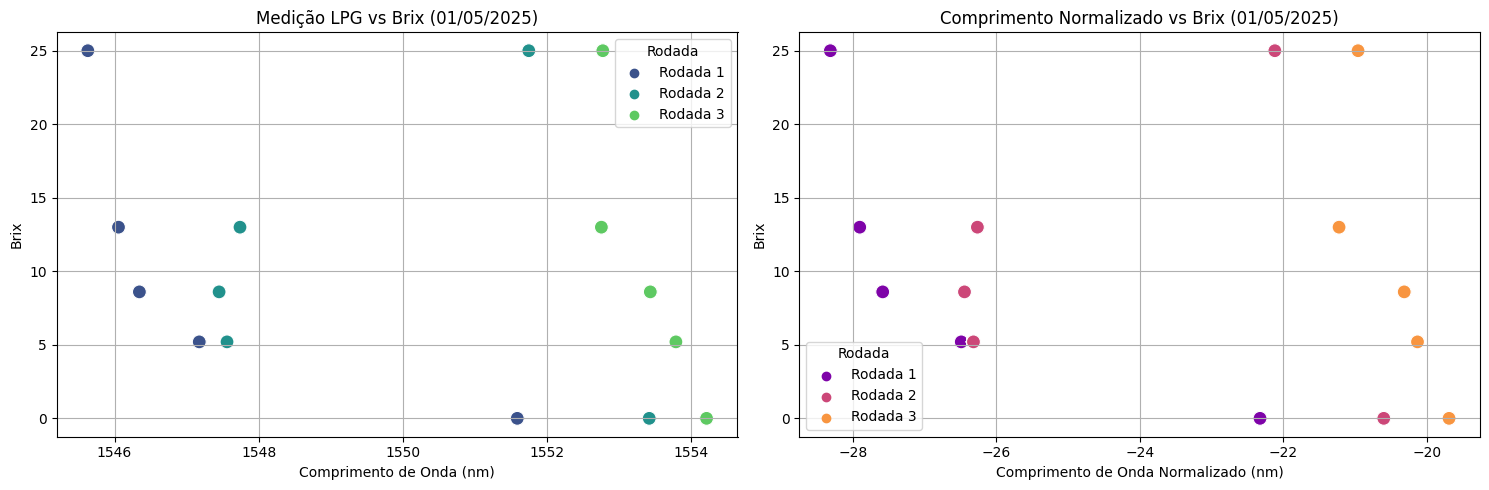

In [28]:
df_filtrado = df[df['data'] == '01/05/2025']

# Criar figura com 2 subplots lado a lado
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# --- Gráfico 1: wavelength_LPG_measurement vs brix ---
sns.scatterplot(
    data=df_filtrado,
    x='wavelength_LPG_measurement',
    y='brix',
    hue='rodadas',  # Diferencia por rodada
    palette='viridis',
    ax=ax1,
    s=100,
)
ax1.set_title('Medição LPG vs Brix (01/05/2025)')
ax1.set_xlabel('Comprimento de Onda (nm)')
ax1.set_ylabel('Brix')
ax1.grid(True)
ax1.legend(title='Rodada')

# --- Gráfico 2: wavelength_normalizado vs brix ---
sns.scatterplot(
    data=df_filtrado,
    x='wavelength_normalizado',  # Assumindo que a coluna já existe (criada anteriormente)
    y='brix',
    hue='rodadas',  # Diferencia por rodada
    palette='plasma',
    ax=ax2,
    s=100,
)
ax2.set_title('Comprimento Normalizado vs Brix (01/05/2025)')
ax2.set_xlabel('Comprimento de Onda Normalizado (nm)')
ax2.set_ylabel('Brix')
ax2.grid(True)
ax2.legend(title='Rodada')

plt.tight_layout()
plt.show()

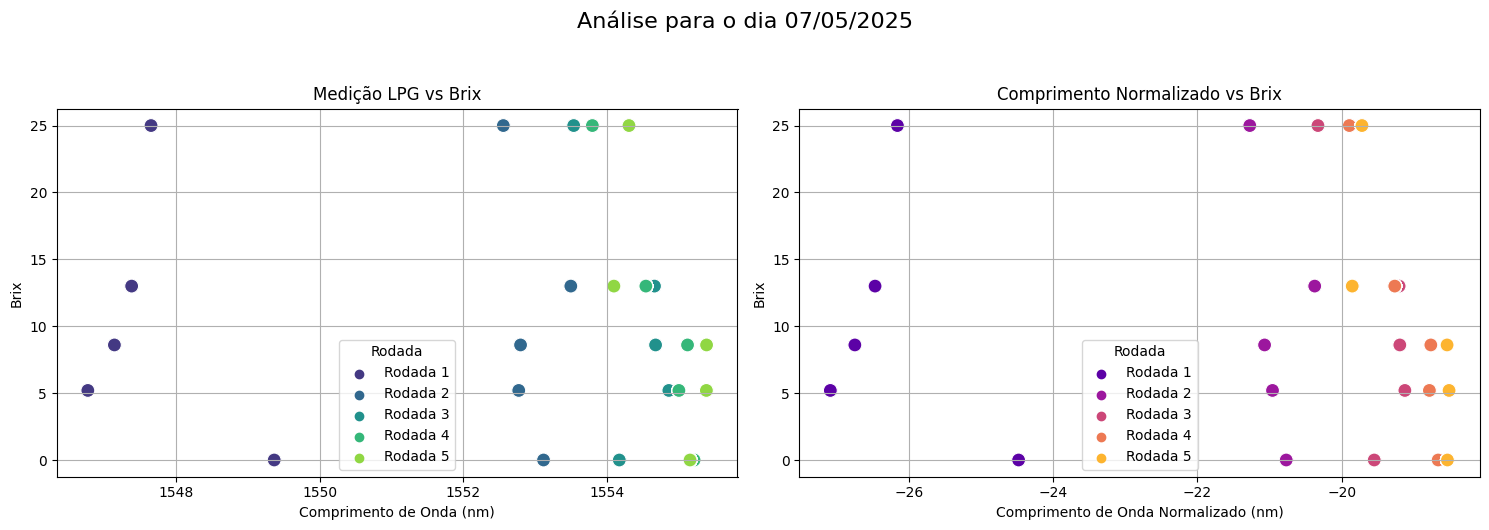

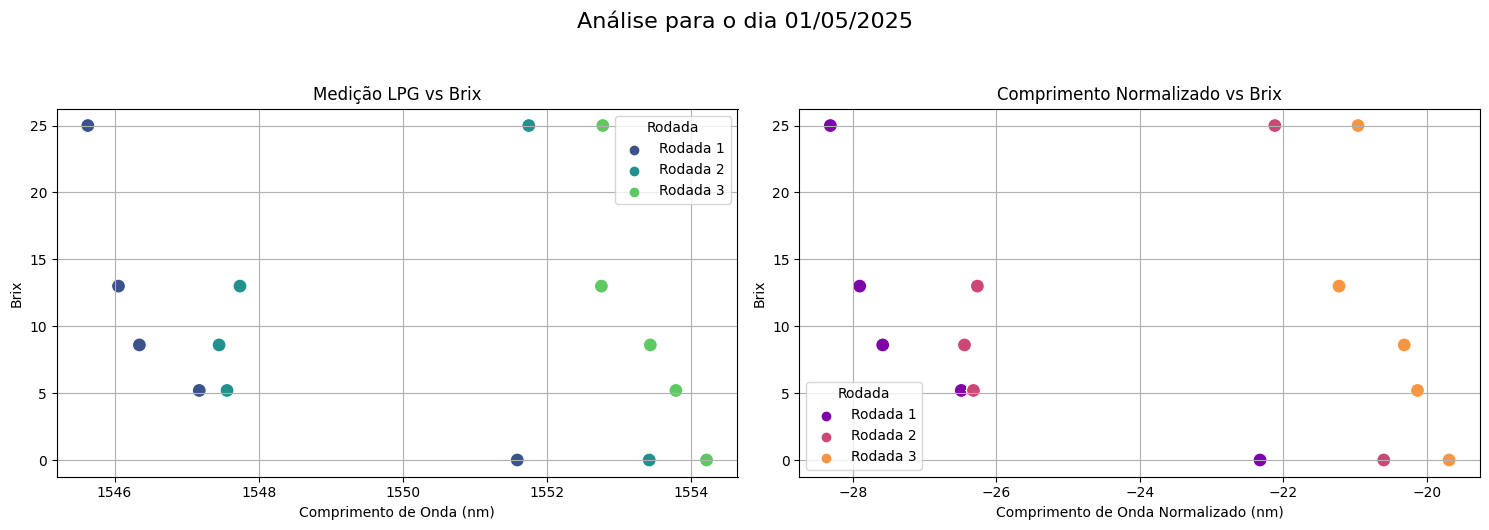

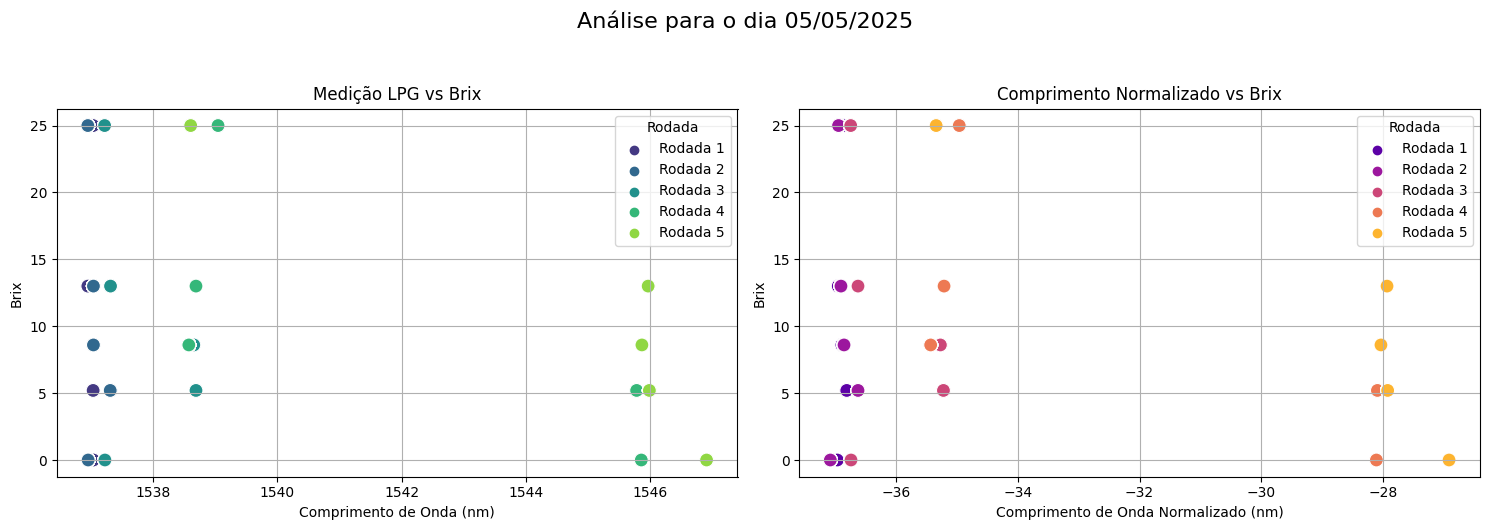

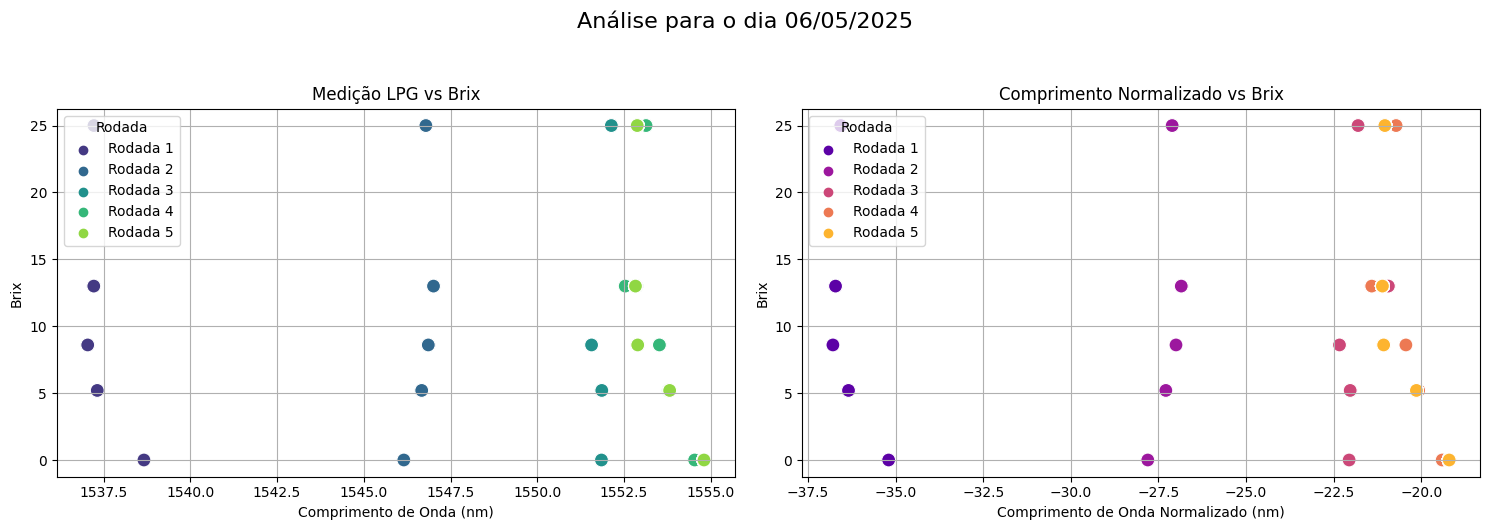

In [30]:
dias_unicos = df['data'].unique()

for dia in dias_unicos:
    df_filtrado = df[df['data'] == dia]
    
    # Criar figura com 2 subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Análise para o dia {dia}', fontsize=16, y=1.05)
    
    # --- Gráfico 1: wavelength_LPG_measurement vs brix ---
    sns.scatterplot(
        data=df_filtrado,
        x='wavelength_LPG_measurement',
        y='brix',
        hue='rodadas',
        palette='viridis',
        ax=ax1,
        s=100,
    )
    ax1.set_title(f'Medição LPG vs Brix')
    ax1.set_xlabel('Comprimento de Onda (nm)')
    ax1.set_ylabel('Brix')
    ax1.grid(True)
    ax1.legend(title='Rodada')
    
    # --- Gráfico 2: wavelength_normalizado vs brix ---
    sns.scatterplot(
        data=df_filtrado,
        x='wavelength_normalizado',
        y='brix',
        hue='rodadas',
        palette='plasma',
        ax=ax2,
        s=100,
    )
    ax2.set_title(f'Comprimento Normalizado vs Brix')
    ax2.set_xlabel('Comprimento de Onda Normalizado (nm)')
    ax2.set_ylabel('Brix')
    ax2.grid(True)
    ax2.legend(title='Rodada')
    
    plt.tight_layout()
    plt.show()

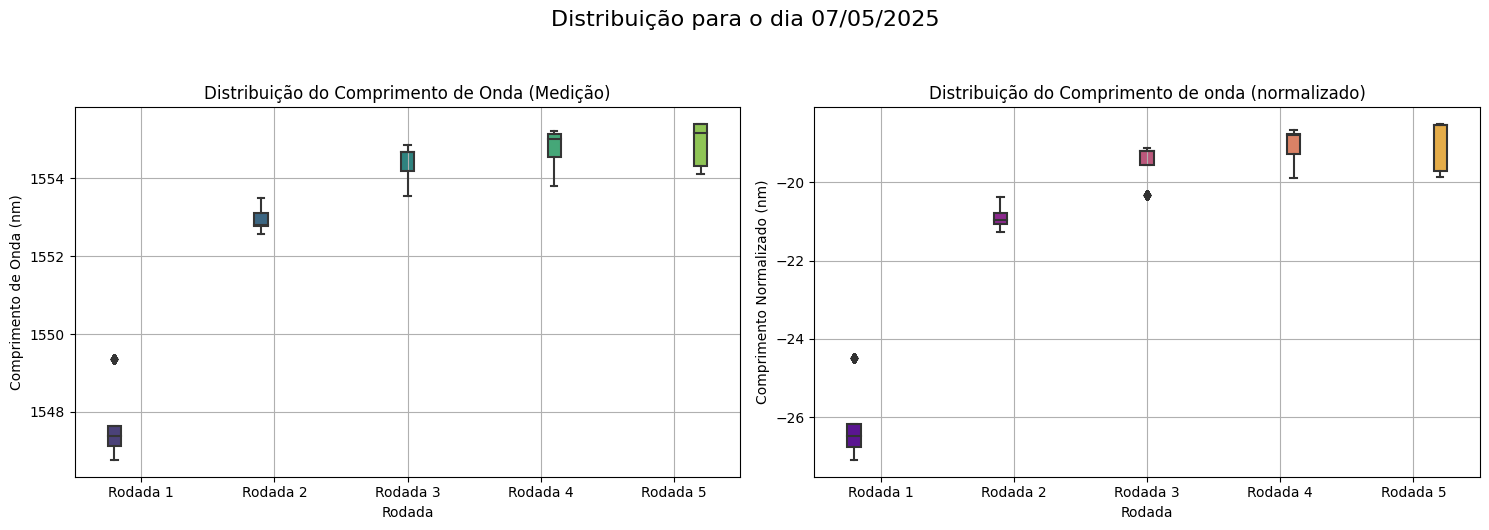

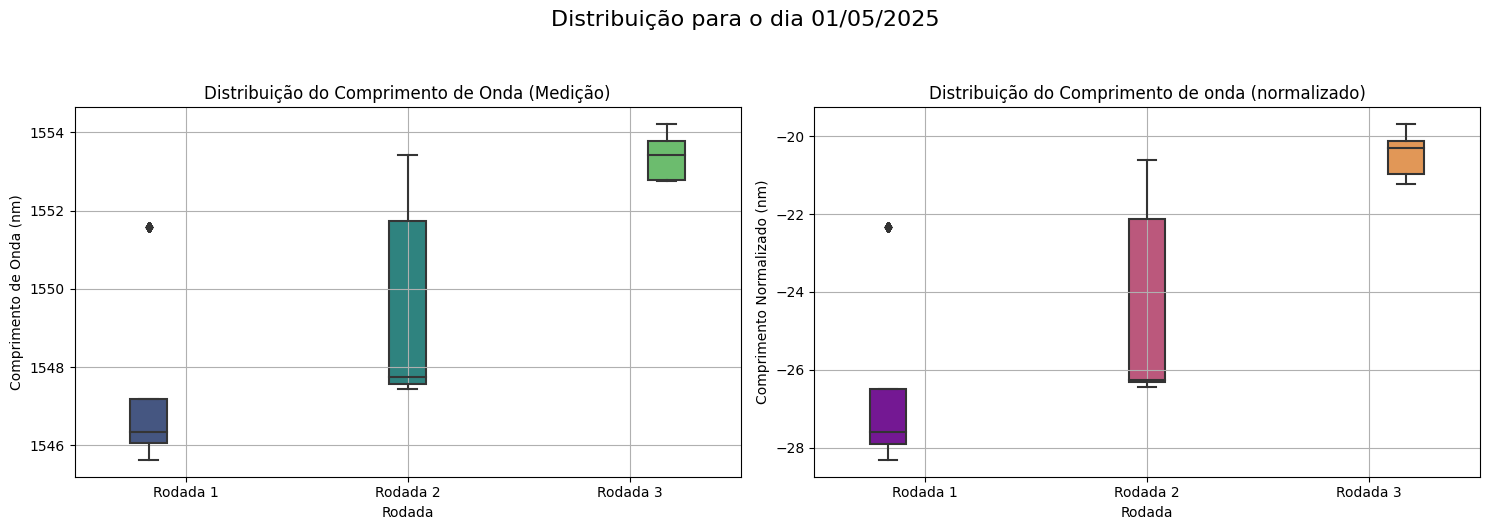

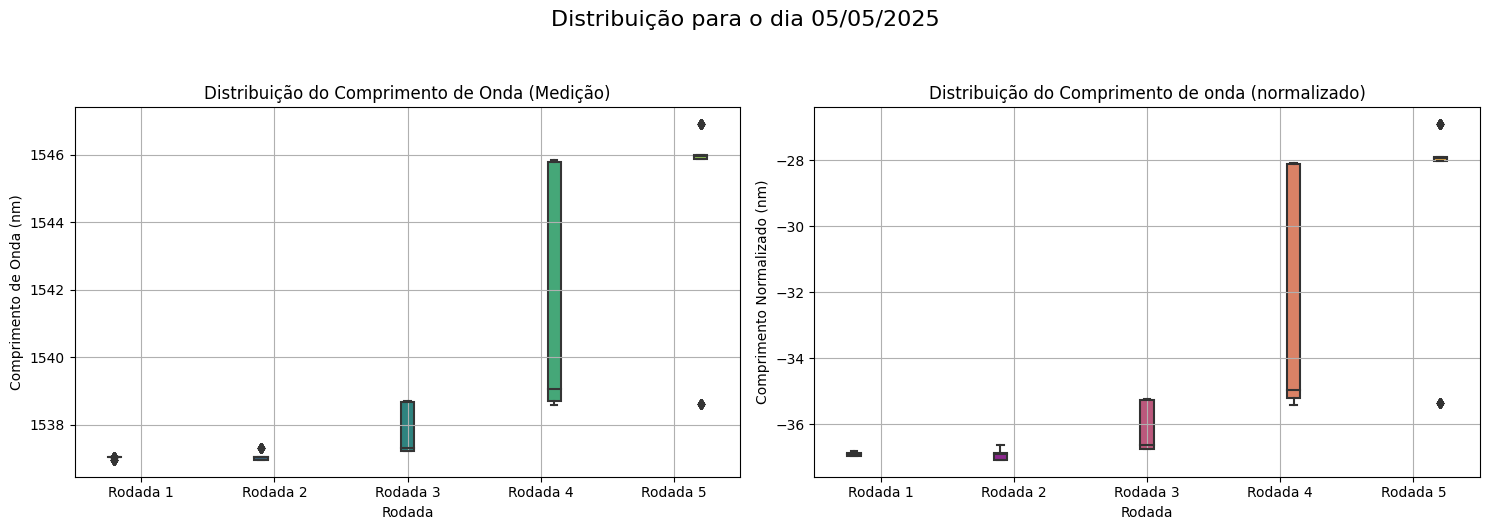

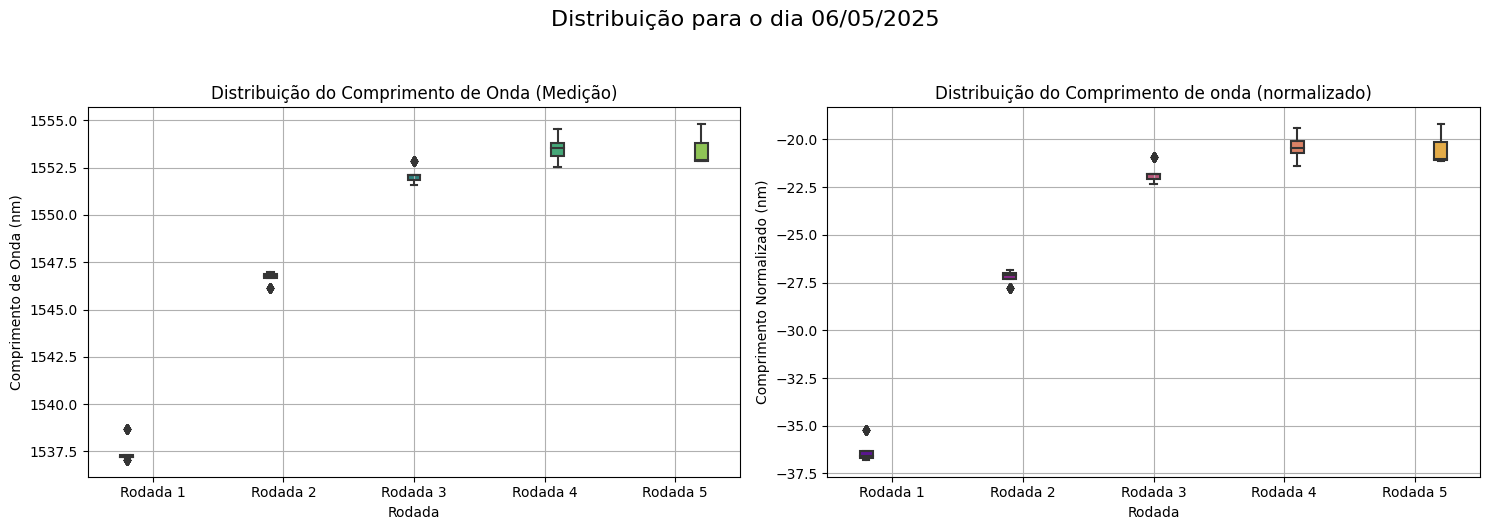

In [32]:

dias_unicos = df['data'].unique()

for dia in dias_unicos:
    df_filtrado = df[df['data'] == dia]
    
    # Criar figura com 2 subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribuição para o dia {dia}', fontsize=16, y=1.05)
    
    # --- Boxplot 1: wavelength_LPG_measurement por rodada ---
    sns.boxplot(
        data=df_filtrado,
        x='rodadas',
        y='wavelength_LPG_measurement',
        hue='rodadas',  # Diferencia cores por rodada
        palette='viridis',
        ax=ax1,
        width=0.5,
    )
    ax1.set_title('Distribuição do Comprimento de Onda (Medição)')
    ax1.set_xlabel('Rodada')
    ax1.set_ylabel('Comprimento de Onda (nm)')
    ax1.grid(True)
    ax1.legend().remove()  # Remove legenda redundante
    
    # --- Boxplot 2: wavelength_normalizado por rodada ---
    sns.boxplot(
        data=df_filtrado,
        x='rodadas',
        y='wavelength_normalizado',
        hue='rodadas',
        palette='plasma',
        ax=ax2,
        width=0.5,
    )
    ax2.set_title('Distribuição do Comprimento de onda (normalizado)')
    ax2.set_xlabel('Rodada')
    ax2.set_ylabel('Comprimento Normalizado (nm)')
    ax2.grid(True)
    ax2.legend().remove()
    
    plt.tight_layout()
    plt.show()

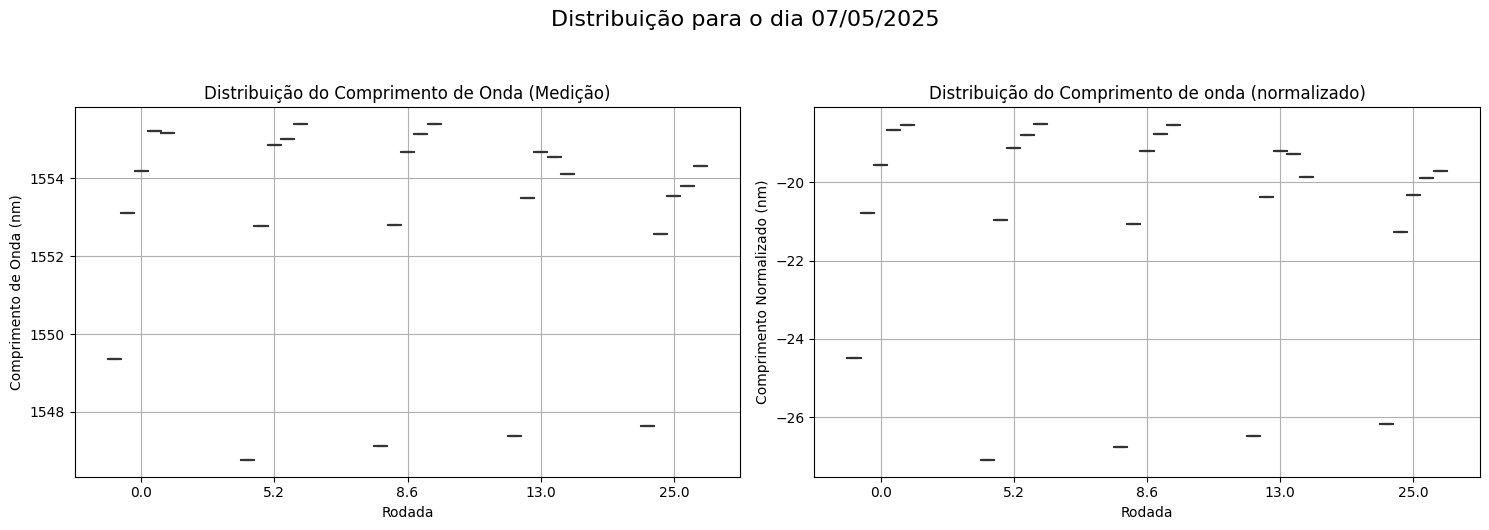

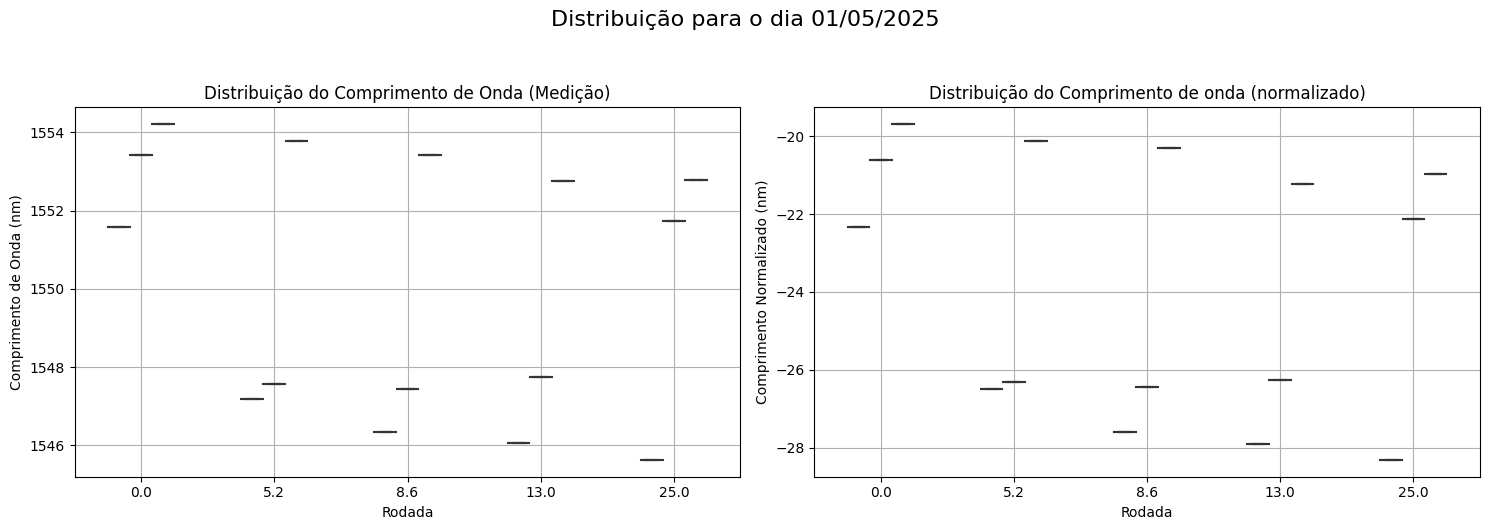

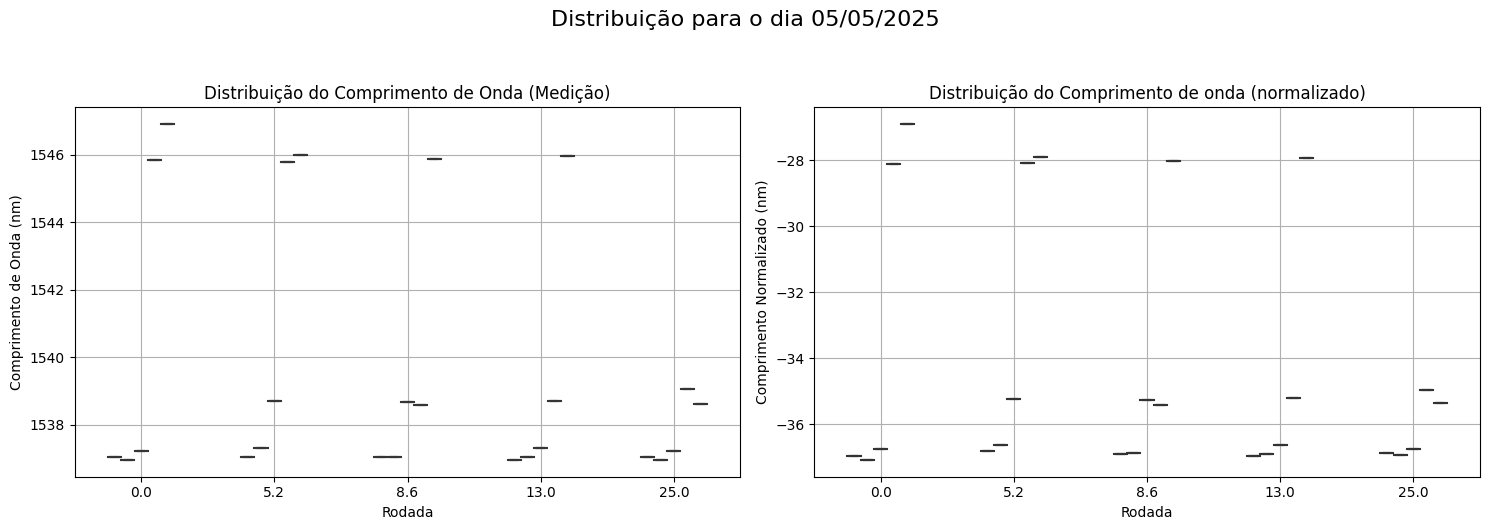

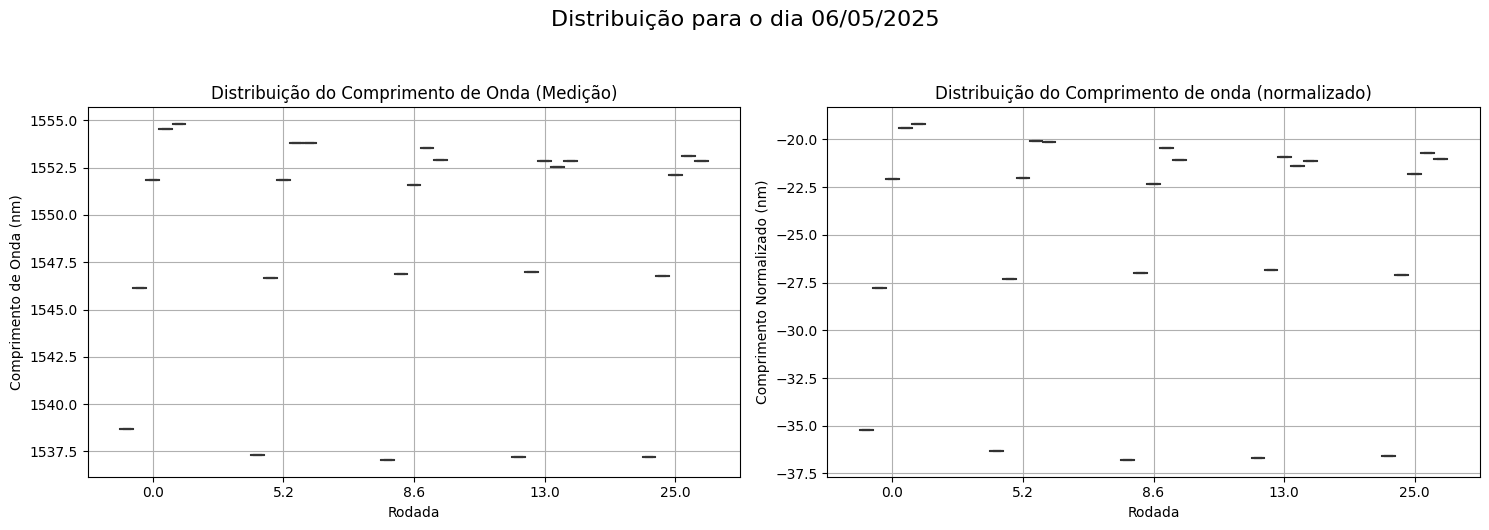

In [33]:

dias_unicos = df['data'].unique()

for dia in dias_unicos:
    df_filtrado = df[df['data'] == dia]
    
    # Criar figura com 2 subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribuição para o dia {dia}', fontsize=16, y=1.05)
    
    # --- Boxplot 1: wavelength_LPG_measurement por rodada ---
    sns.boxplot(
        data=df_filtrado,
        x='brix',
        y='wavelength_LPG_measurement',
        hue='rodadas',  # Diferencia cores por rodada
        palette='viridis',
        ax=ax1,
        width=0.5,
    )
    ax1.set_title('Distribuição do Comprimento de Onda (Medição)')
    ax1.set_xlabel('Rodada')
    ax1.set_ylabel('Comprimento de Onda (nm)')
    ax1.grid(True)
    ax1.legend().remove()  # Remove legenda redundante
    
    # --- Boxplot 2: wavelength_normalizado por rodada ---
    sns.boxplot(
        data=df_filtrado,
        x='brix',
        y='wavelength_normalizado',
        hue='rodadas',
        palette='plasma',
        ax=ax2,
        width=0.5,
    )
    ax2.set_title('Distribuição do Comprimento de onda (normalizado)')
    ax2.set_xlabel('Rodada')
    ax2.set_ylabel('Comprimento Normalizado (nm)')
    ax2.grid(True)
    ax2.legend().remove()
    
    plt.tight_layout()
    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


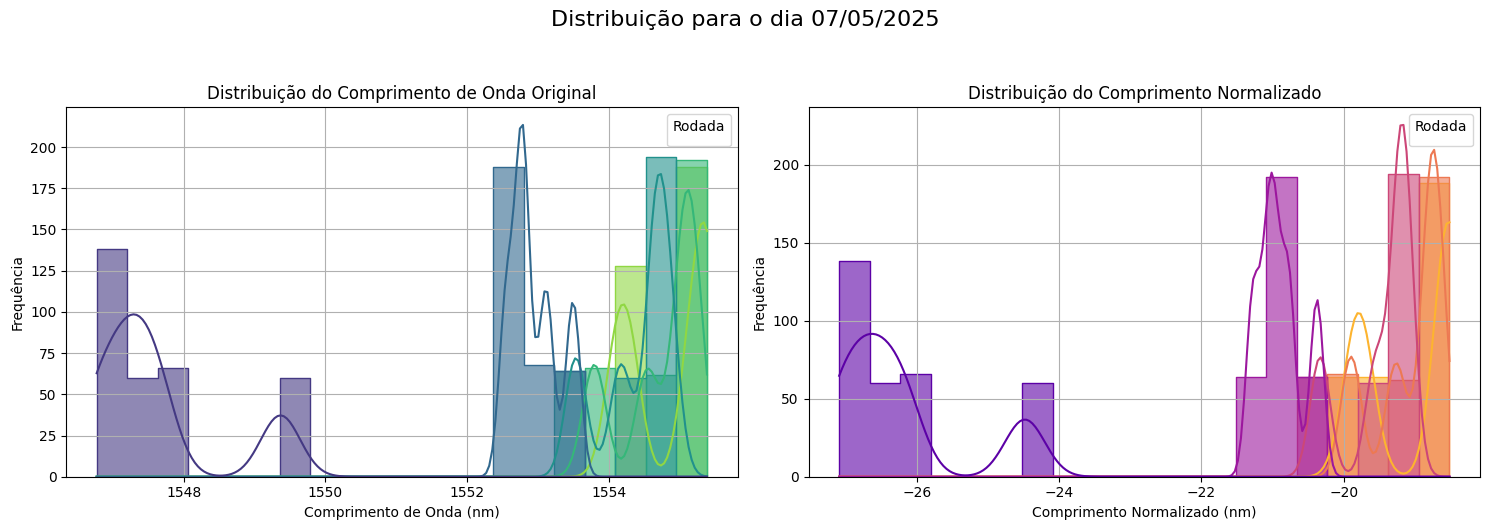

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


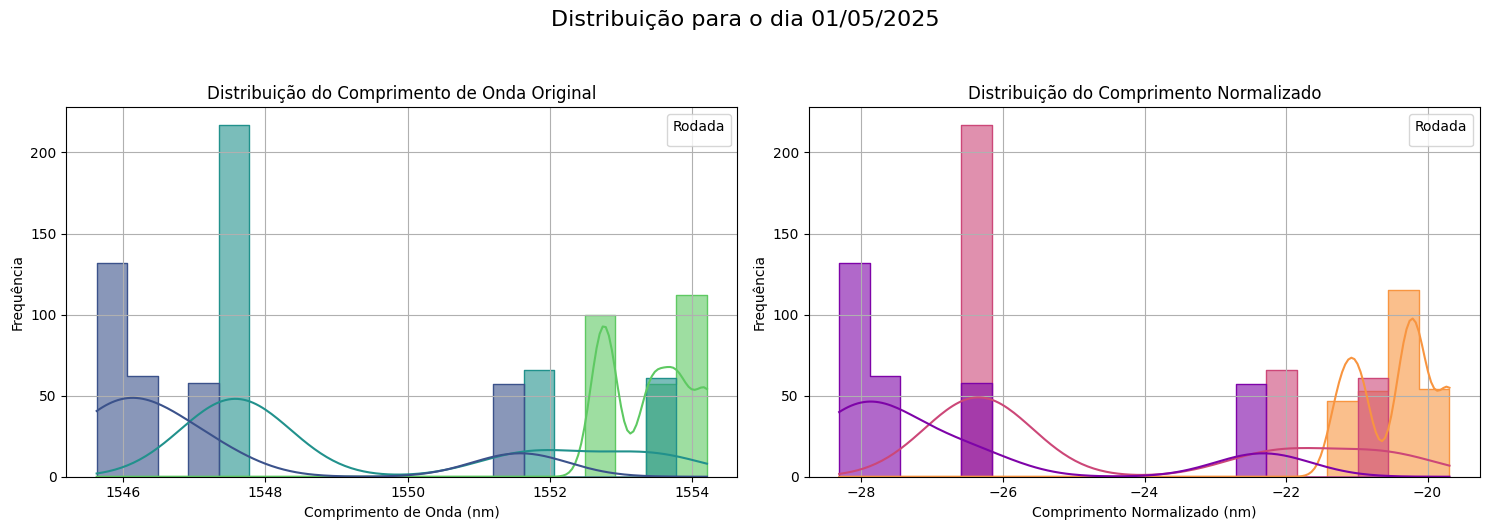

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


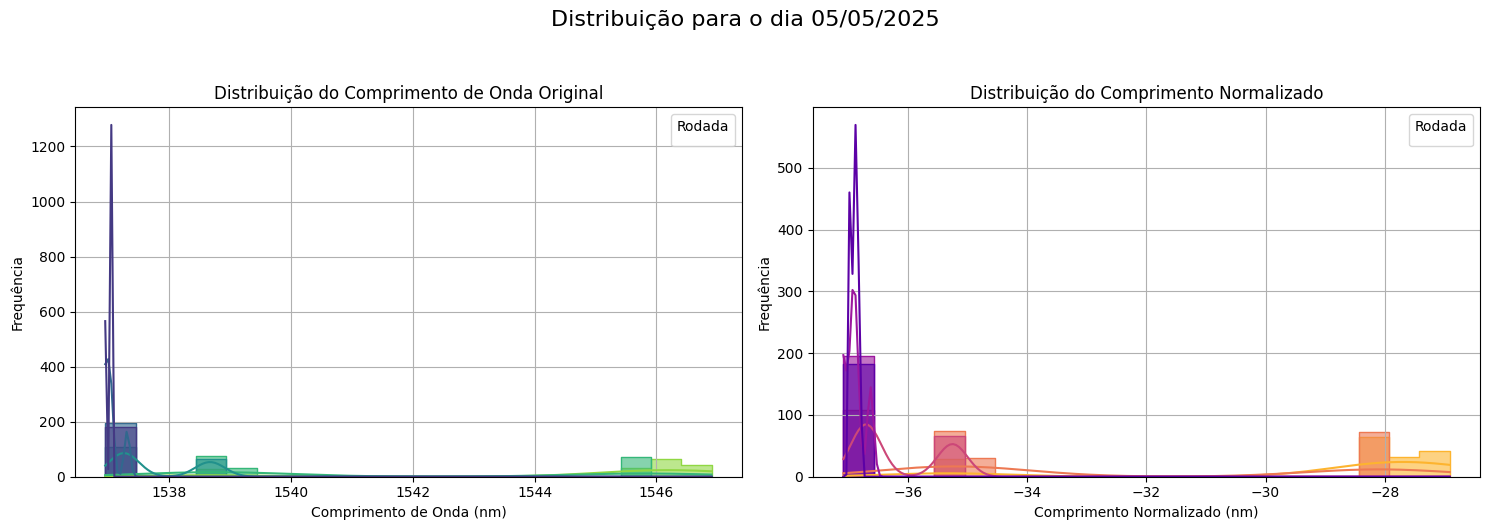

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


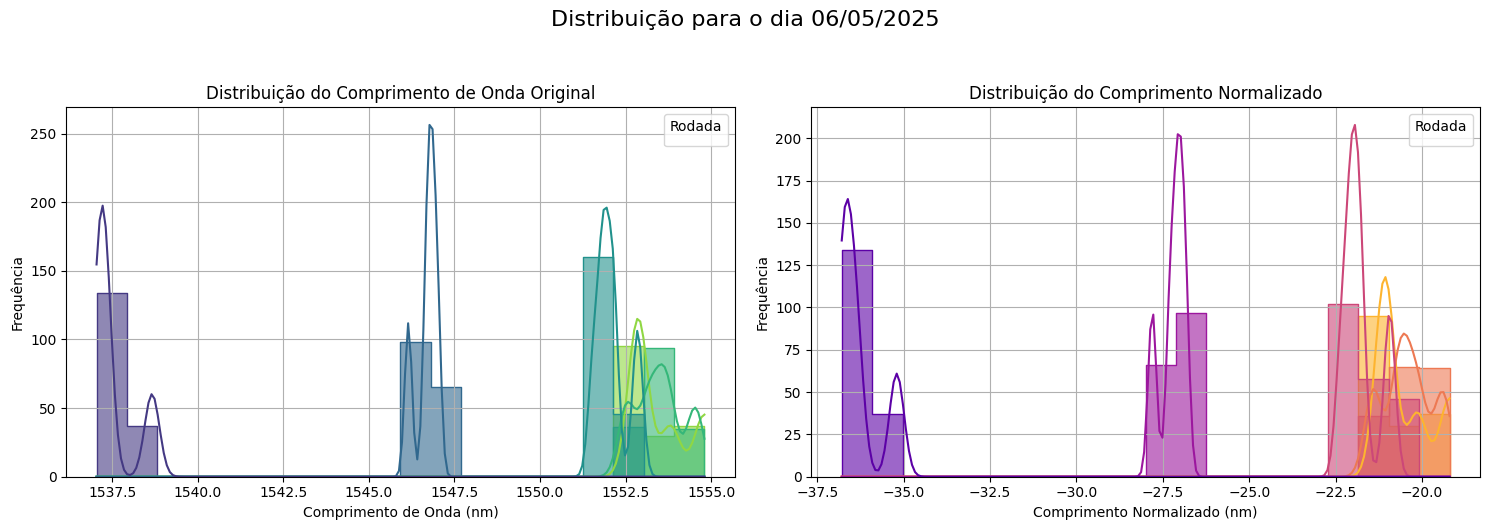

In [67]:
dias_unicos = df['data'].unique()

for dia in dias_unicos:
    df_filtrado = df[df['data'] == dia]
    
    # Criar figura com 2 subplots lado a lado
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    fig.suptitle(f'Distribuição para o dia {dia}', fontsize=16, y=1.05)
    
    # --- Histograma 1: wavelength_LPG_measurement ---
    sns.histplot(
        data=df_filtrado,
        x='wavelength_LPG_measurement',
        hue='rodadas',  # Separa por rodadas
        kde=True,       # Adiciona linha de densidade
        bins=20,        # Número de bins
        palette='viridis',
        ax=ax1,
        alpha=0.6,      # Transparência
        element='step'  # Estilo das barras
    )
    ax1.set_title('Distribuição do Comprimento de Onda Original')
    ax1.set_xlabel('Comprimento de Onda (nm)')
    ax1.set_ylabel('Frequência')
    ax1.grid(True)
    ax1.legend(title='Rodada')
    
    # --- Histograma 2: wavelength_normalizado ---
    sns.histplot(
        data=df_filtrado,
        x='wavelength_normalizado',
        hue='rodadas',
        kde=True,
        bins=20,
        palette='plasma',
        ax=ax2,
        alpha=0.6,
        element='step'
    )
    ax2.set_title('Distribuição do Comprimento Normalizado')
    ax2.set_xlabel('Comprimento Normalizado (nm)')
    ax2.set_ylabel('Frequência')
    ax2.grid(True)
    ax2.legend(title='Rodada')
    
    plt.tight_layout()
    plt.show()


📌 Estatísticas Descritivas por Dia e Rodada:
                      wavelength_LPG_measurement                                                                                      wavelength_normalizado                                                                              brix                                                 
                                           count         mean       std          min          25%       50%          75%          max                  count       mean       std        min        25%       50%        75%        max  count       mean       std  min  25%   50%   75%   max
grupo                                                                                                                                                                                                                                                                                          
01/05/2025 - Rodada 1                      309.0  1547.251359  2.125081  1545.630000  1546

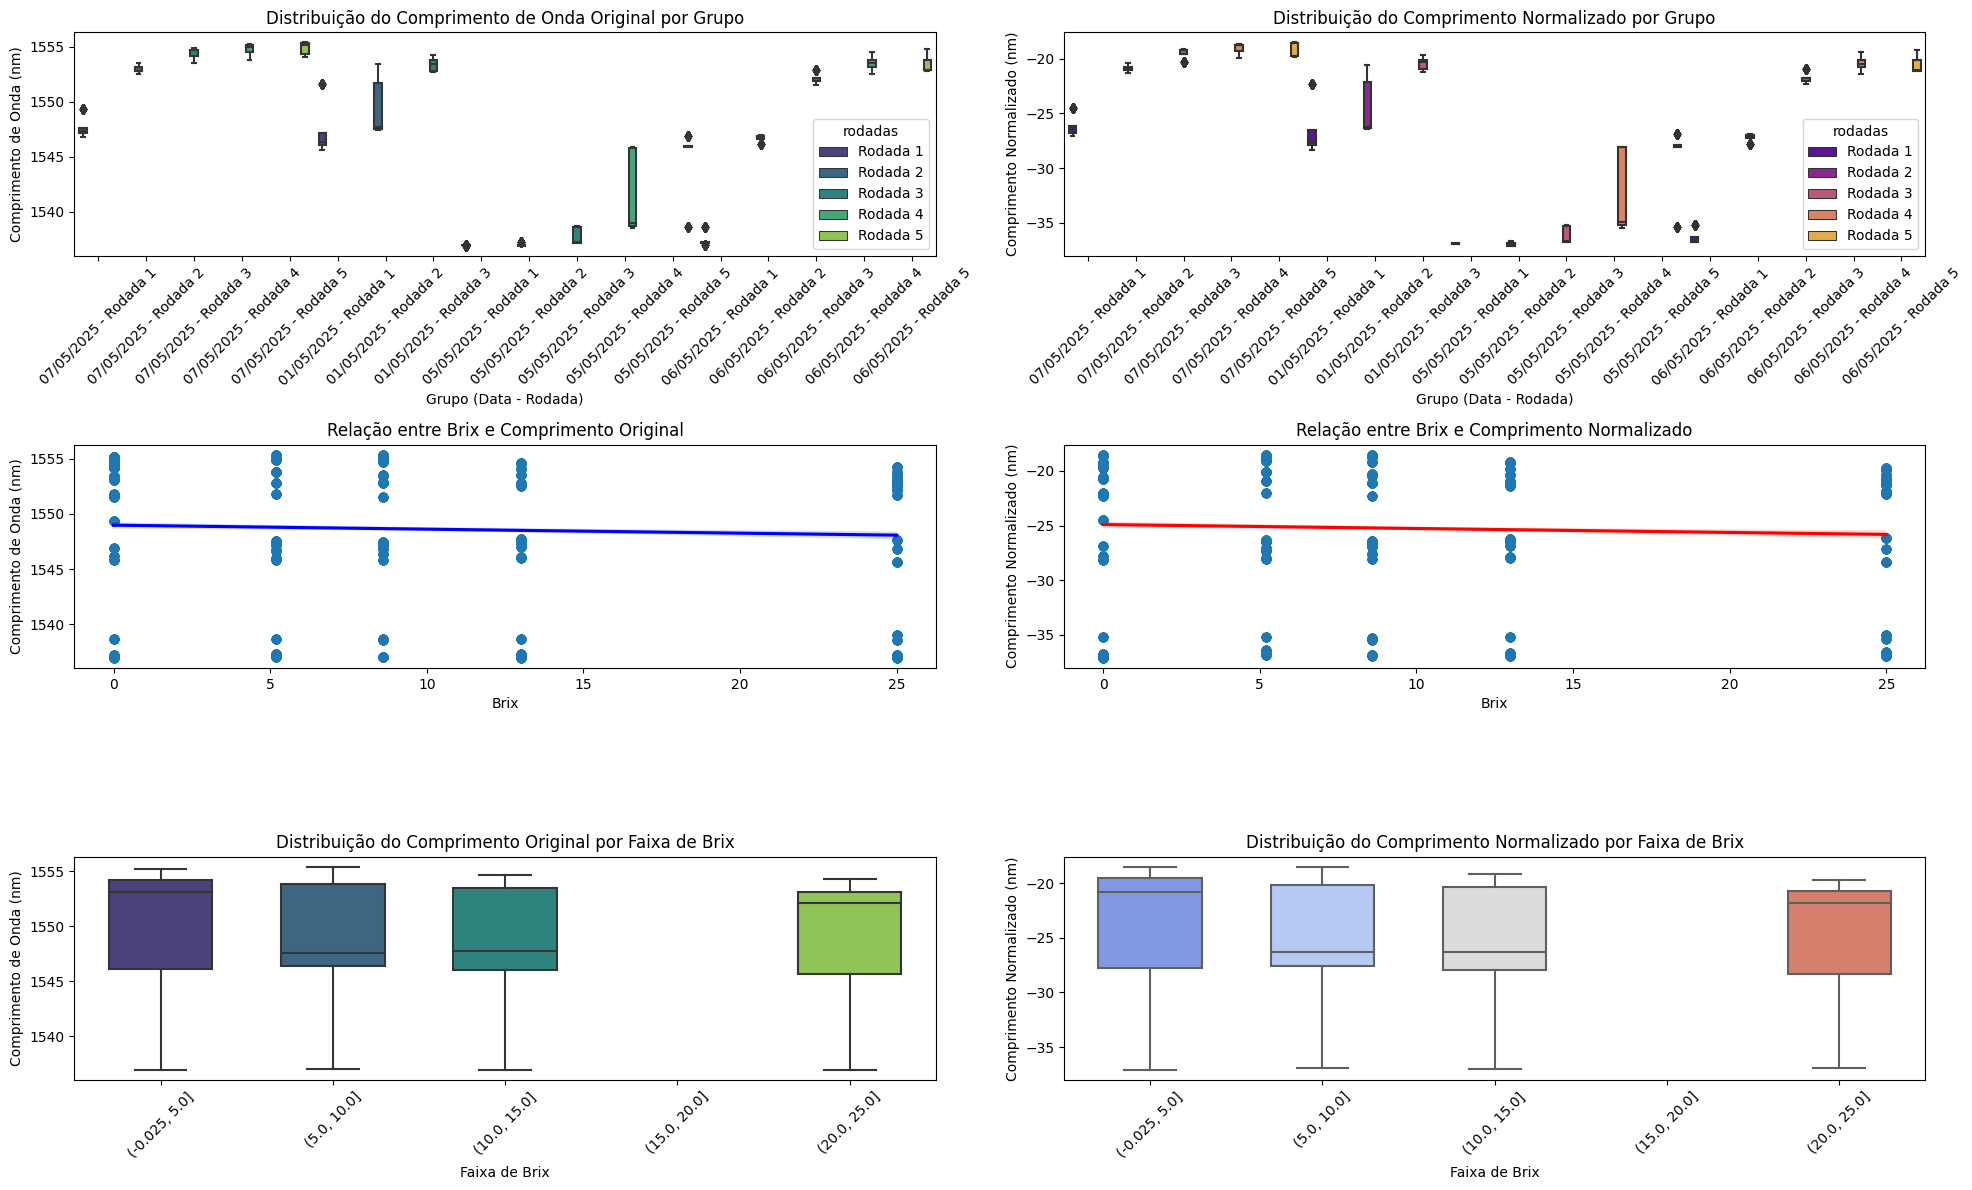

In [54]:

# 1. Criar uma coluna combinando 'data' e 'rodadas' para análise agrupada
df['grupo'] = df['data'] + ' - ' + df['rodadas']

# 2. Estatísticas descritivas por grupo
print("\n📌 Estatísticas Descritivas por Dia e Rodada:")
stats = df.groupby('grupo')[['wavelength_LPG_measurement', 'wavelength_normalizado', 'brix']].describe()
print(stats)

# 3. Análise de Correlação entre Brix e Comprimento de Onda
correlation = df[['wavelength_LPG_measurement', 'wavelength_normalizado', 'brix']].corr()
print("\n📊 Matriz de Correlação:")
print(correlation)

# 4. Visualização Gráfica
plt.figure(figsize=(20, 12))

# --- Gráfico 1: Boxplot comparativo ---
plt.subplot(3, 2, 1)
sns.boxplot(
    data=df,
    x='grupo',
    y='wavelength_LPG_measurement',
    hue='rodadas',
    palette='viridis'
)
plt.title('Distribuição do Comprimento de Onda Original por Grupo')
plt.xticks(rotation=45)
plt.xlabel('Grupo (Data - Rodada)')
plt.ylabel('Comprimento de Onda (nm)')

# --- Gráfico 2: Boxplot do Normalizado ---
plt.subplot(3, 2, 2)
sns.boxplot(
    data=df,
    x='grupo',
    y='wavelength_normalizado',
    hue='rodadas',
    palette='plasma'
)
plt.title('Distribuição do Comprimento Normalizado por Grupo')
plt.xticks(rotation=45)
plt.xlabel('Grupo (Data - Rodada)')
plt.ylabel('Comprimento Normalizado (nm)')

# --- Gráfico 3: Scatter Plot com Regressão (Brix vs Normalizado) ---
plt.subplot(3, 2, 4)
sns.regplot(
    data=df,
    x='brix',
    y='wavelength_normalizado',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'}
)
plt.title('Relação entre Brix e Comprimento Normalizado')
plt.xlabel('Brix')
plt.ylabel('Comprimento Normalizado (nm)')

# --- Gráfico 4: Scatter Plot (Brix vs Original) ---
plt.subplot(3, 2, 3)
sns.regplot(
    data=df,
    x='brix',
    y='wavelength_LPG_measurement',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'blue'}
)
plt.title('Relação entre Brix e Comprimento Original')
plt.xlabel('Brix')
plt.ylabel('Comprimento de Onda (nm)')

df['brix_bins'] = pd.cut(df['brix'], bins=5)  # Ajuste o número de bins conforme necessário
plt.subplot(3, 2, 6)
sns.boxplot(
    data=df,
    x='brix_bins',
    y='wavelength_normalizado',
    hue='brix_bins',  # Cor por faixa de Brix
    palette='coolwarm',
    dodge=False,  # Evita separação desnecessária
    width=0.6
)
plt.title('Distribuição do Comprimento Normalizado por Faixa de Brix')
plt.xlabel('Faixa de Brix')
plt.ylabel('Comprimento Normalizado (nm)')
plt.xticks(rotation=45)
plt.legend().remove()  # Remove legenda redundante

# --- Gráfico 6: Boxplot de wavelength_LPG_measurement por faixa de Brix ---
plt.subplot(3, 2, 5)  # 2ª linha, 2ª coluna

sns.boxplot(
    data=df,
    x='brix_bins',
    y='wavelength_LPG_measurement',
    hue='brix_bins',
    palette='viridis',
    dodge=False,
    width=0.6
)
plt.title('Distribuição do Comprimento Original por Faixa de Brix')
plt.xlabel('Faixa de Brix')
plt.ylabel('Comprimento de Onda (nm)')
plt.xticks(rotation=45)
plt.legend().remove()

plt.tight_layout()
plt.show()


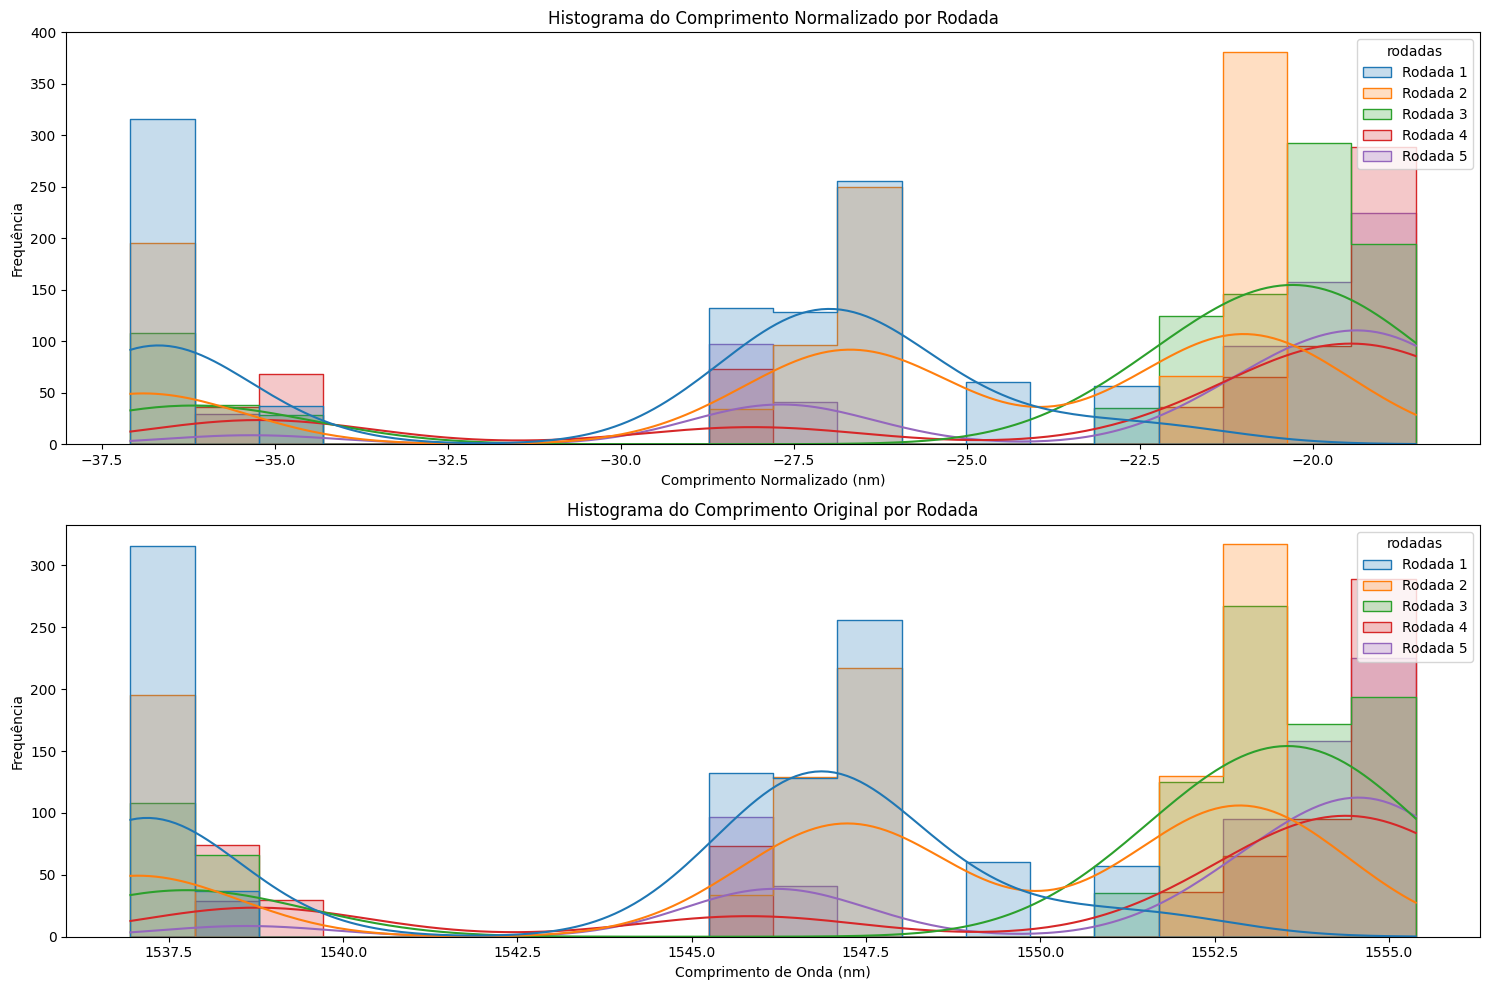

In [56]:
plt.figure(figsize=(15, 10))

# --- Histograma 1: Comprimento Normalizado ---
plt.subplot(2, 1, 1)
sns.histplot(
    data=df,
    x='wavelength_normalizado',
    hue='rodadas',  # Cores por rodada
    bins=20,
    kde=True,
    element='step'  # Barras sobrepostas
)
plt.title('Histograma do Comprimento Normalizado por Rodada')
plt.xlabel('Comprimento Normalizado (nm)')
plt.ylabel('Frequência')

# --- Histograma 2: Comprimento Original ---
plt.subplot(2, 1, 2)
sns.histplot(
    data=df,
    x='wavelength_LPG_measurement',
    hue='rodadas',
    bins=20,
    kde=True,
    element='step'
)
plt.title('Histograma do Comprimento Original por Rodada')
plt.xlabel('Comprimento de Onda (nm)')
plt.ylabel('Frequência')

plt.tight_layout()
plt.show()

In [50]:

from scipy import stats
df['grupo'] = df['data'] + ' - ' + df['rodadas']
def confidence_interval_lower(data):
    ci = stats.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))
    return ci[0]

def confidence_interval_upper(data):
    ci = stats.t.interval(confidence=0.95, df=len(data)-1, loc=np.mean(data), scale=stats.sem(data))
    return ci[1]

# Métricas a serem calculadas (ajuste para o nome correto da coluna 'normalizado')
metrics = {
    'wavelength_LPG_measurement': ['mean', 'std', 'var', 'min', 'max', confidence_interval_lower, confidence_interval_upper],
    'wavelength_normalizado': ['mean', 'std', 'var', 'min', 'max', confidence_interval_lower, confidence_interval_upper],
    'brix': ['mean', 'std', 'var', 'min', 'max']
}

# Calcular métricas agrupadas
grouped_stats = df.groupby('grupo').agg(metrics)

# Renomear colunas para clareza
grouped_stats.columns = [
    f"{col[0]}_{col[1]}" if col[1] != '' else f"{col[0]}" 
    for col in grouped_stats.columns
]

# Formatar saída
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
print("📊 Métricas Estatísticas por Grupo (Data - Rodada):")
print(grouped_stats.round(2))

# Correlação entre variáveis
print("\n🔍 Matriz de Correlação (Geral):")
print(df[['wavelength_LPG_measurement', 'wavelength_normalizado', 'brix']].corr().round(2))

📊 Métricas Estatísticas por Grupo (Data - Rodada):
                       wavelength_LPG_measurement_mean  wavelength_LPG_measurement_std  wavelength_LPG_measurement_var  wavelength_LPG_measurement_min  wavelength_LPG_measurement_max  wavelength_LPG_measurement_confidence_interval_lower  wavelength_LPG_measurement_confidence_interval_upper  wavelength_normalizado_mean  wavelength_normalizado_std  wavelength_normalizado_var  wavelength_normalizado_min  wavelength_normalizado_max  wavelength_normalizado_confidence_interval_lower  wavelength_normalizado_confidence_interval_upper  brix_mean  brix_std  brix_var  brix_min  brix_max
grupo                                                                                                                                                                                                                                                                                                                                                                         